<a href="https://colab.research.google.com/github/Sandeep4349/SCT-Tasks/blob/main/SCT_DS_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Accuracy: 0.8920

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.73      0.17      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.81      0.58      0.61      9043
weighted avg       0.88      0.89      0.86      9043


Confusion Matrix:
 [[7883   69]
 [ 908  183]]


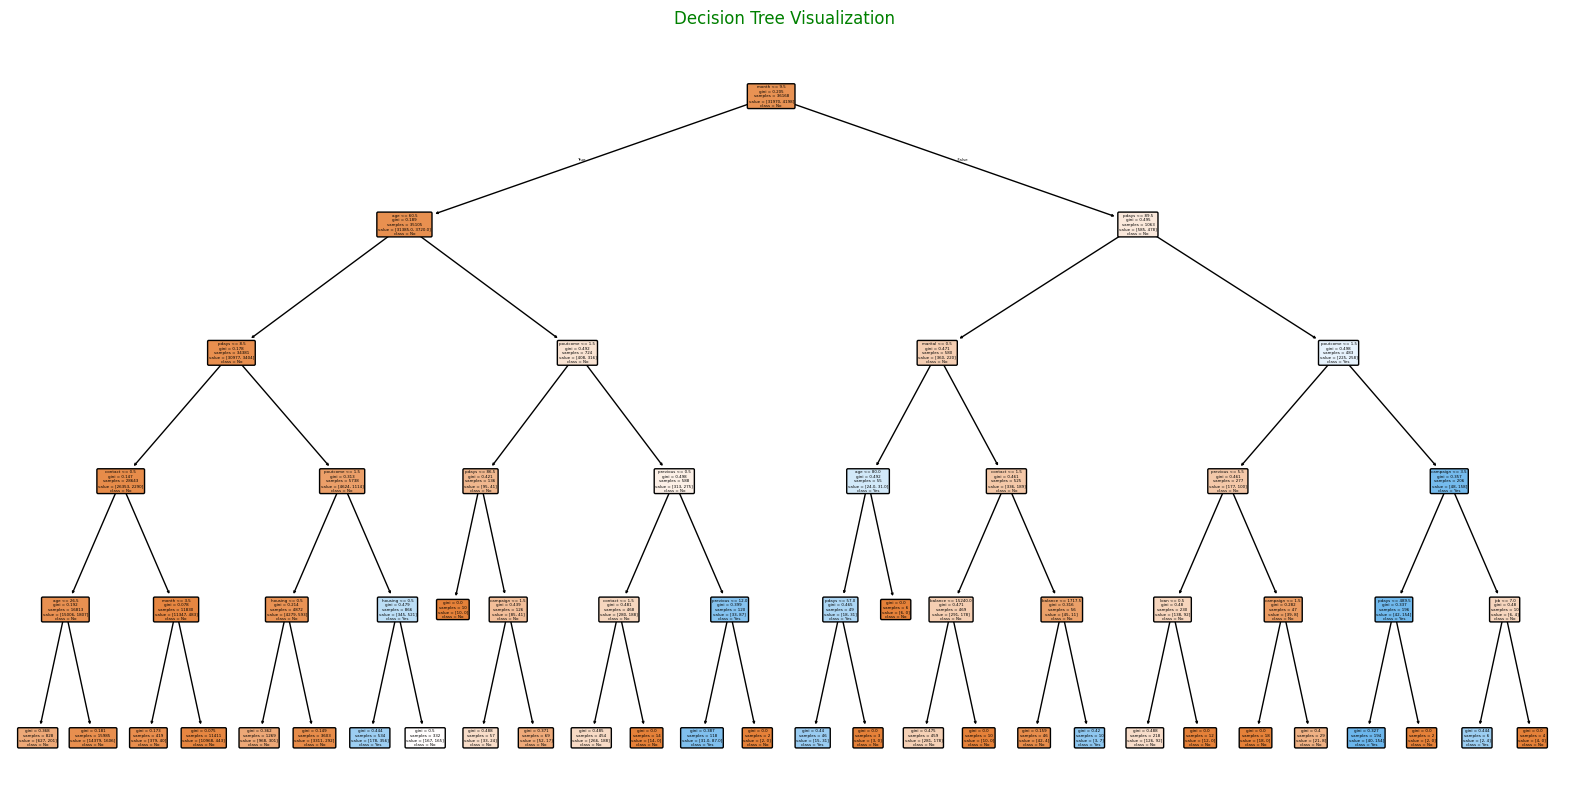

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. Load the Data
try:
    data = pd.read_csv('/content/bank-full.csv', sep=';')
except FileNotFoundError:
    print("Error: The file 'bank-full.csv' was not found.  Make sure the path is correct.")
    exit()

# 2. Data Preprocessing
# a. Handle Missing Values
print("Missing values:\n", data.isnull().sum())

# b. Convert Categorical Features to Numerical
categorical_cols = data.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# 3. Feature Selection (Demographic and Behavioral Features)

# Define demographic features
demographic_features = ['age', 'job', 'marital', 'education']  # Adjust based on your interpretation

# Define behavioral features
behavioral_features = ['default', 'housing', 'loan', 'contact', 'month',
                         'campaign', 'pdays', 'previous', 'poutcome', 'balance']  # Added 'balance'

# Combine selected features
selected_features = demographic_features + behavioral_features


# Check if all selected features exist in the dataframe
missing_features = [feature for feature in selected_features if feature not in data.columns]
if missing_features:
    print(f"Error: The following features are missing from the dataset: {missing_features}")
    print('-------------------------')
    exit()

X = data[selected_features]
y = data['y']  # Target variable

# 4. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the Decision Tree Model
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

# 6. Make Predictions on the Test Set
y_pred = model.predict(X_test)

# 7. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization",color='green')
plt.show()

